In [84]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [85]:
# Load dataset
data = pd.read_csv('tips (data for regression problem).csv')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [86]:

X = data[['total_bill']].values 
y = data['tip'].values  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

Fits a straight line through the data.

In [87]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

Linear Regression R2: 0.5449381659234664


## **Ridge Regression**
Like linear regression but with an L2 regularization term to reduce overfitting

In [88]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))


Ridge Regression R2: 0.544945834233854


## **Lasso Regression**
Similar to ridge but uses an L1 penalty, which can set some coefficients to zero, effectively performing feature selection.

In [89]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))



Lasso Regression R2: 0.545076817885791


 ## **Decision Tree Regression**
Splits data into regions with similar values, capturing non-linear relationships.

In [90]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))



Decision Tree R2: -0.06898287247700985


## **Ensemble Method (Random Forest Regression)**
An ensemble of decision trees that improves stability and accuracy.

In [91]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))


Random Forest R2: 0.21349875048162892


## **Support Vector Regression (SVR)**
Uses kernels to fit complex patterns.

In [92]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print('SVR R2:', r2_score(y_test, y_pred_svr))



SVR R2: 0.5218870832760052


## **K-Nearest Neighbors (KNN) Regression**
Predicts the target by averaging the values of the closest data points.

In [93]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))


KNN Regression R2: 0.4545453410143979


In [94]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))


KNN Regression R2: 0.4545453410143979


## Plots

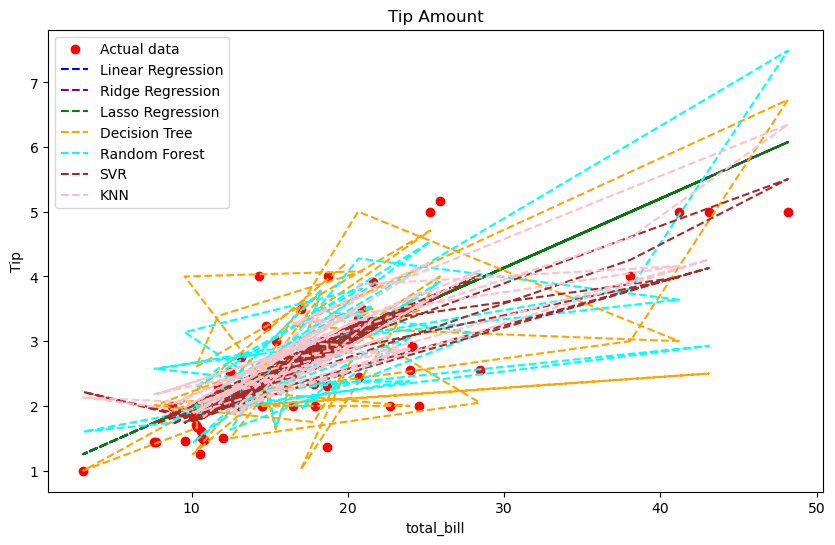

In [95]:
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual data')

plt.plot(X_test, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test, y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Tip Amount')
plt.xlabel('total_bill')
plt.ylabel('Tip')
plt.legend()
plt.show()

## Check for the whole data

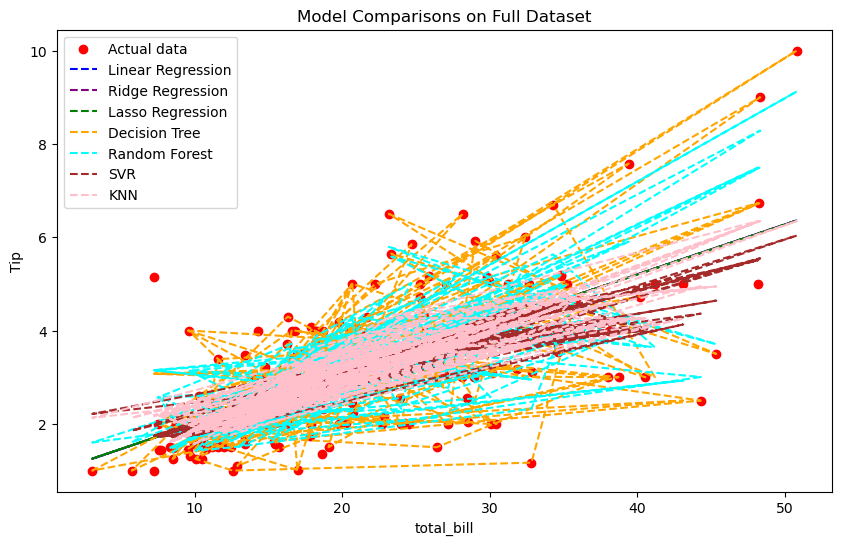

In [96]:
##linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)
svr_reg.fit(X_train_scaled, y_train_scaled)  # SVR with scaled data
knn_reg.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred_linear = linear_reg.predict(X)
y_pred_ridge = ridge_reg.predict(X)
y_pred_lasso = lasso_reg.predict(X)
y_pred_tree = tree_reg.predict(X)
y_pred_forest = forest_reg.predict(X)

X_scaled = sc_X.transform(X)
y_pred_svr = svr_reg.predict(X_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()

y_pred_knn = knn_reg.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual data')

# Plot each model's predictions
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X, y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Full Dataset')
plt.xlabel('total_bill')
plt.ylabel('Tip')
plt.legend()
plt.show()


In [97]:
df= pd.read_csv('tips (data for regression problem).csv')

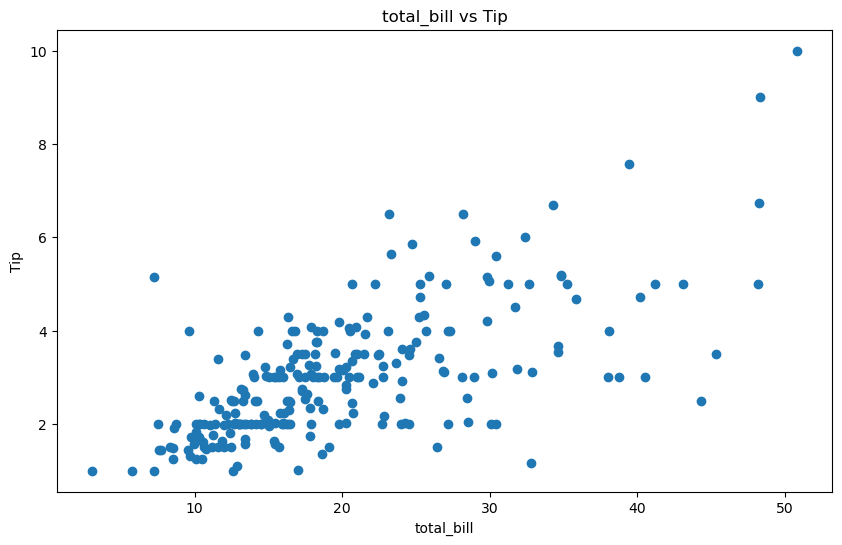

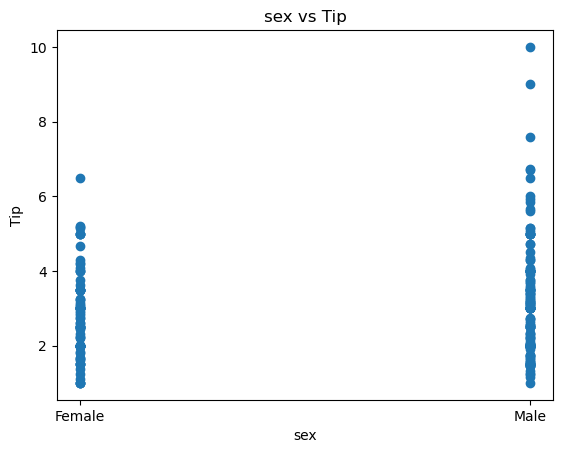

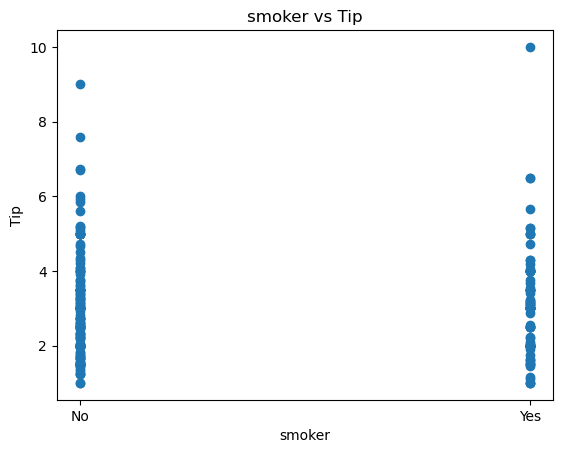

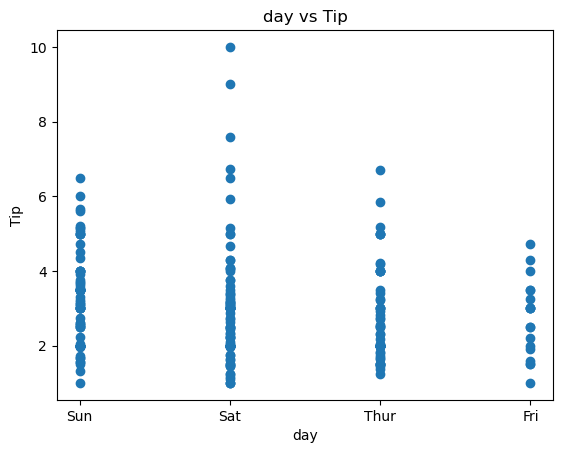

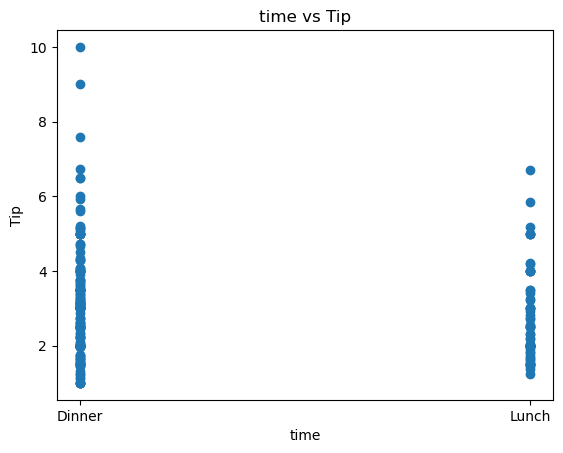

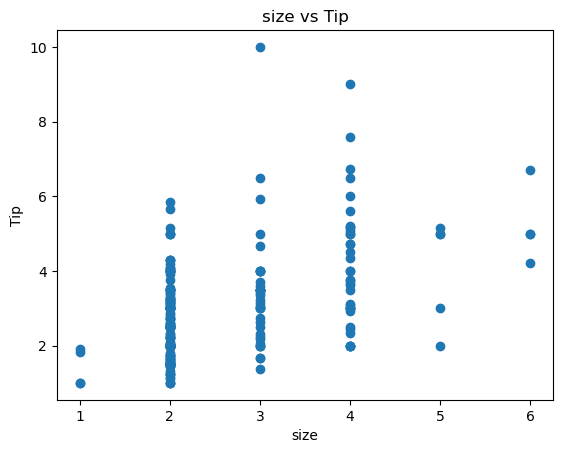

In [98]:
df_data = df.drop(columns=['tip'])
df_target = df['tip']

plt.figure(figsize=(10, 6))
# Scatter Plot
for i in range(0,6):
    plt.scatter(df_data.iloc[:,i], df_target)
    plt.xlabel(df_data.columns[i])
    plt.ylabel('Tip')
    plt.title(df_data.columns[i] + ' vs Tip')
    plt.show()

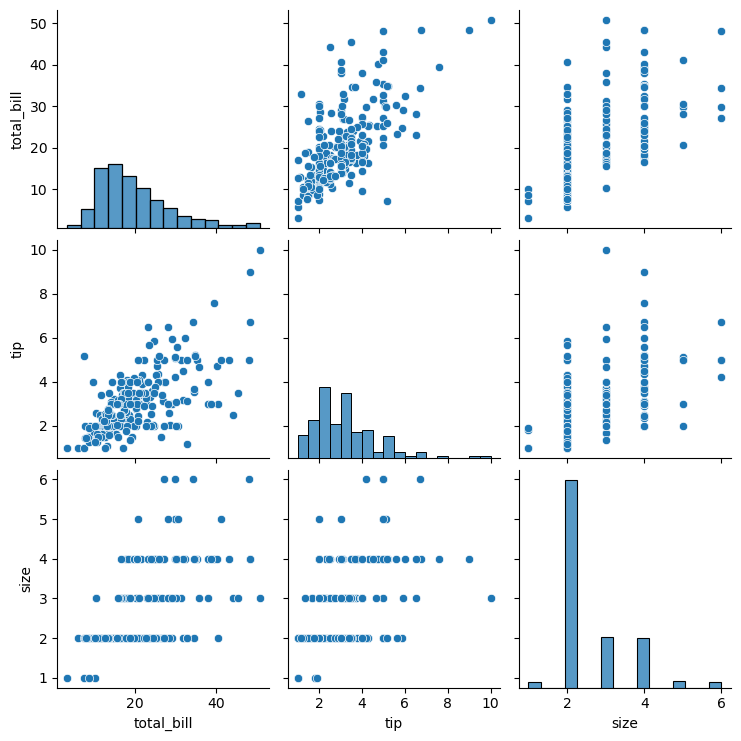

In [99]:
sns.pairplot(df)

<Axes: >

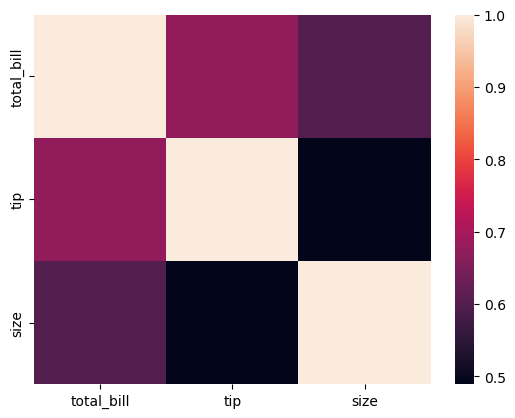

In [100]:
df_corr = df[['total_bill', 'tip', 'size']].copy()
corr = df_corr.corr()
sns.heatmap(corr)

correlation fund between total bill and tp and size and tip

## Rainbow Test

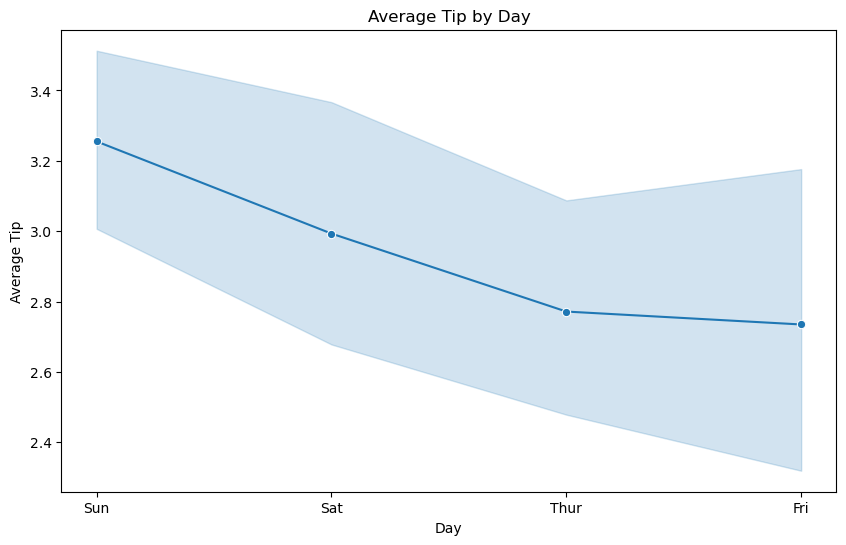

In [101]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

## Residuals Plot

In [105]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression -\nMSE:", mse_svr, "\nR^2:", r2_svr, "\nRMSE:", np.sqrt(mse_svr))

Support Vector Regression -
MSE: 0.6248756630497339 
R^2: 0.500088009686849 
RMSE: 0.7904907735386504


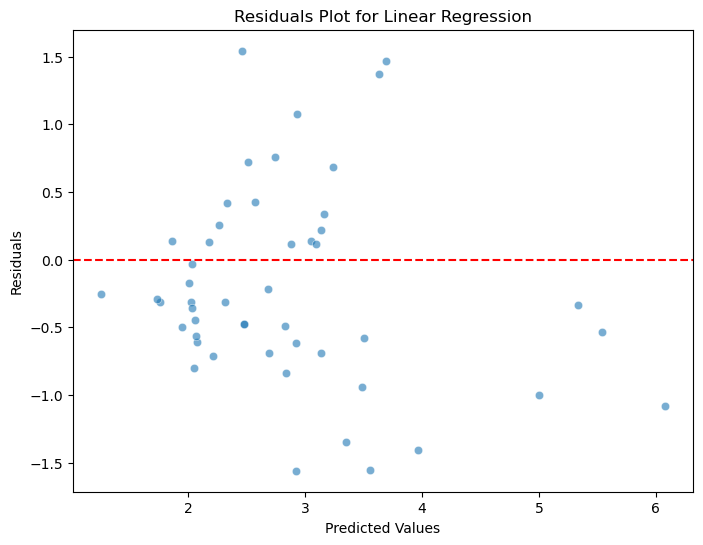

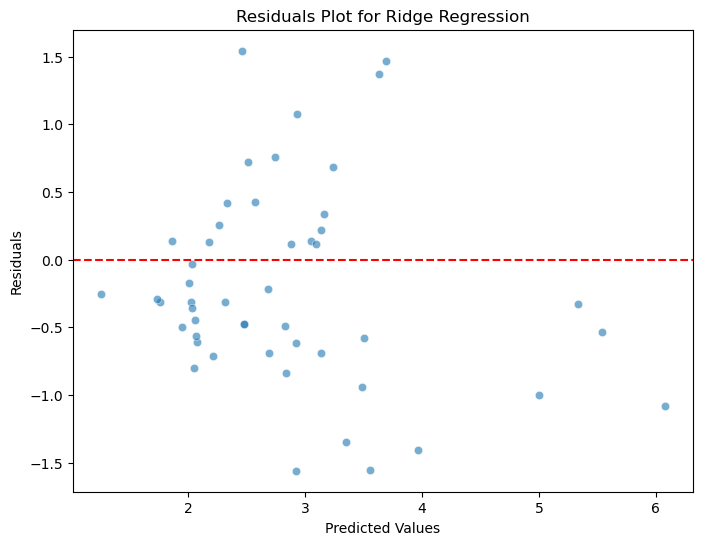

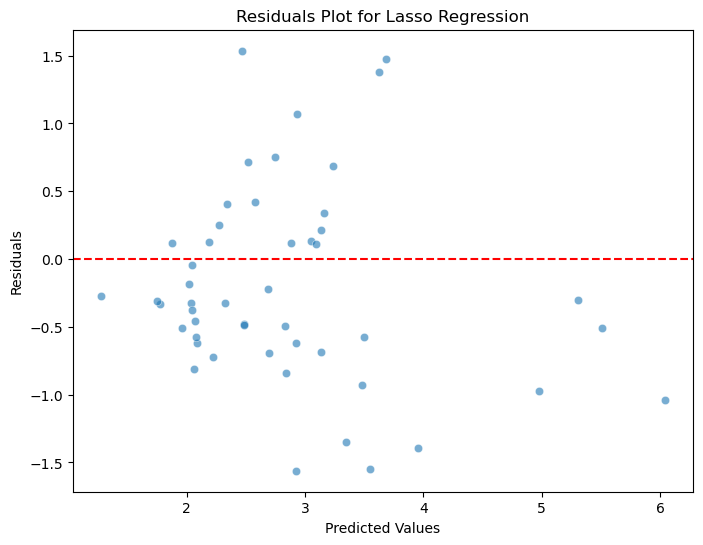

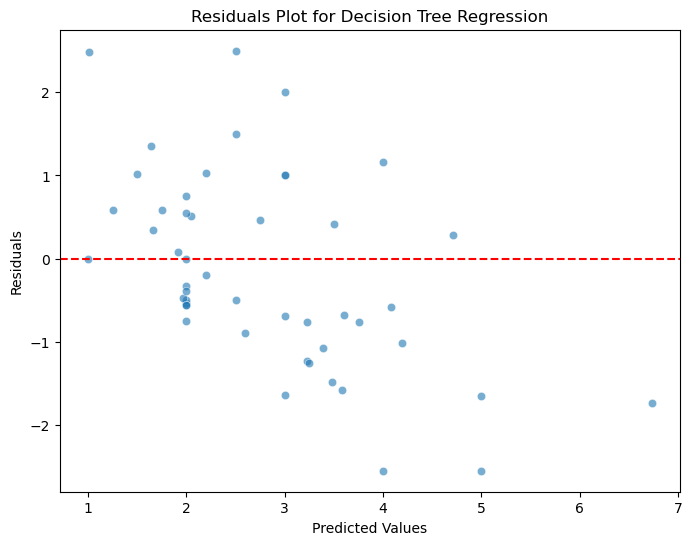

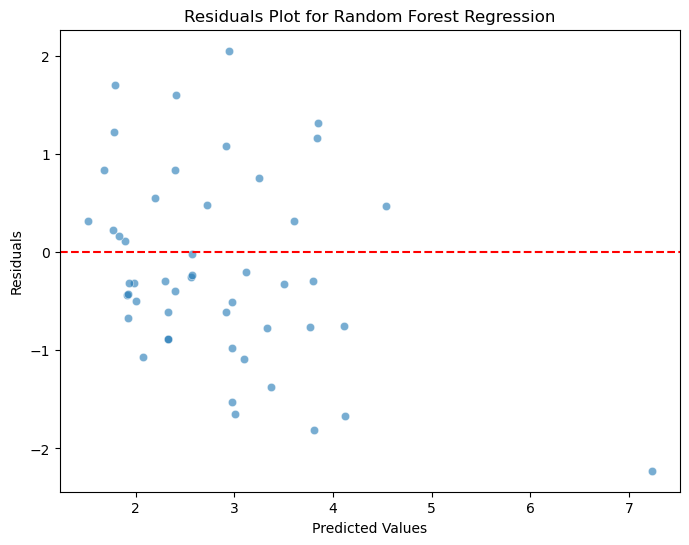

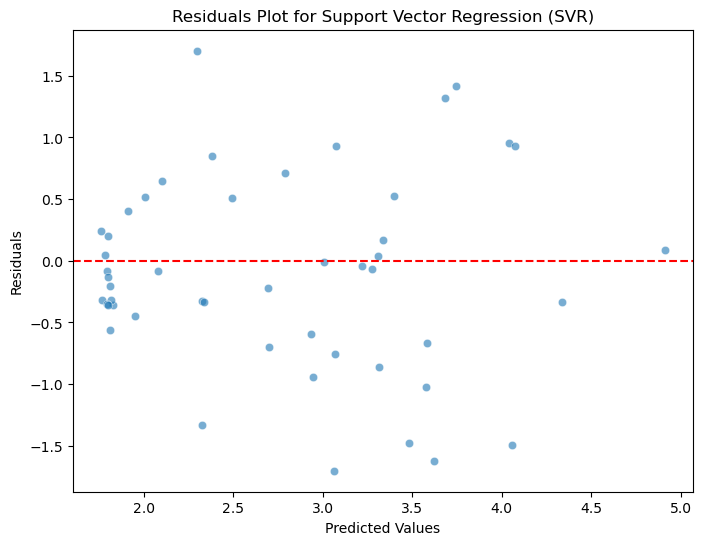

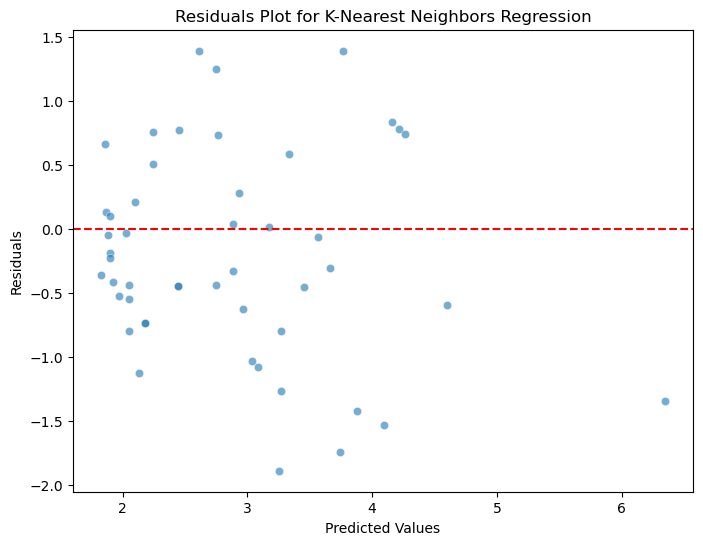

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Define a helper function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# Assuming X_train, X_test, y_train, y_test are defined
# 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
plot_residuals(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")


from the above, we notice that desicion tree have the least residuals, which means they might be overfitting the data.

### Conclusion

The business should target their best servie to customers on the Sundays and increase quality of services on the Friday to make the tip rate higher.
The business should also focus on the dinner time to increase the tip rate
Higher number of people in a table should be given higher priority as they tend to tip more
The business should also focus on the total bill as it has a high correlation with the tip amount